# <center> <font size="20"> -- Course Project Part 3 -- </font> </center>



<br/>

## <font size="20"> &#8681; </font> Import

- Import all packages required for Part 3

In [1]:
# import
#--------------------------------------------------#
import os 
import sys
import os.path
from sys import platform
from pathlib import Path
#--------------------------------------------------#
import re
import sys
import time
import copy
import math
import html
import scipy
import pickle
import random
import argparse
import subprocess
import numpy as np
import pandas as pd

#--------------------------------------------------#
from xgboost import XGBClassifier
#--------------------------------------------------#
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#--------------------------------------------------#
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
#--------------------------------------------------#
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#--------------------------------------------------#
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
#--------------------------------------------------#
from sklearn import metrics
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
#--------------------------------------------------#
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
#--------------------------------------------------#

# Vader
import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#--------------------------------------------------#
import warnings
warnings.filterwarnings("ignore")
#--------------------------------------------------#
from typing import Optional, Union, Tuple, Type, Sequence, List, Set, Dict, Any, TextIO, IO




[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\cesiu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!




<br/>

## <font size="20"> &#8681; </font> Deal with different environments. 
- Make sure the notebook runs properly in different environments.

In [2]:
#====================================================================================================#
# Install google-related packages. 

# !pip install google-colab
# !pip install --upgrade google-cloud
# !pip install --upgrade google-cloud-vision
# !pip install --upgrade google-api-python-client

#====================================================================================================#
# Identify if the env is google colab.
import sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB == True:
    from google.colab import drive
    drive.mount('/content/gdrive')
    file_1      = '/content/gdrive/MyDrive/sentiment_analysis.csv' 
    data_file   = '/content/gdrive/MyDrive/sentiment_analysis.csv' 
    data_folder = Path("./")
    # Will need to change all the file address in this notebook in order to .





<br/>

## <font size="20"> &#11088; </font>  <font size="20">**Part 3 Main**</font>

In [3]:
from ZX_Part_3_Main import *

#====================================================================================================#
# Args
Step_code               = "P03A_"
saved_preproc_dataset_1 = "Saving_preproc_dataset_1.p"
saved_preproc_dataset_2 = "Saving_preproc_dataset_2.p"
reprocess_dataset       = False

#====================================================================================================#
# Process Data 
if os.path.exists(saved_preproc_dataset_1) and not reprocess_dataset: 
    df_cleaned_1_all = pd.read_pickle(saved_preproc_dataset_1)
    print("\n\n" + "=" * 125 + "\nCleaned Part 2 Dataset #1 : ")
    beautiful_print(df_cleaned_1_all)
else:
    df_raw_1 = Load_dataset_1()
    df_cleaned_1_all = Clean_data(df_raw_1, num_words_lb = 2)
    df_cleaned_1_all.to_pickle(saved_preproc_dataset_1)

if os.path.exists(saved_preproc_dataset_2) and not reprocess_dataset: 
    df_cleaned_2_all = pd.read_pickle(saved_preproc_dataset_2)
    print("\n\n" + "=" * 125 + "\nCleaned Part 2 Dataset #2 : ")
    beautiful_print(df_cleaned_2_all)
else:
    df_raw_2 = Load_dataset_2()
    df_cleaned_2_all = Clean_data(df_raw_2, num_words_lb = 2)
    df_cleaned_2_all.to_pickle(saved_preproc_dataset_2)

# df_cleaned_1_all.to_csv(path_or_buf = "Saving_preproc_dataset_1.csv")
# df_cleaned_2_all.to_csv(path_or_buf = "Saving_preproc_dataset_2.csv")



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\cesiu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!




Cleaned Part 2 Dataset #1 : 
                                                                                                                  cleaned_text
0      uhm thats quite the increase . i also heared they were recently testing some emergency infrastructure in the baltics...
1      poland also announced that they plan to double their armed forces from 120k to 300k and increase military spending t...
2                          remember , nato knows more than were being told . thats an alarming amount of troops at the ready .
3      well done , putin . top 2022 salesman of nato . before this stupid , cruel war , germany didn't want anything to do ...
4      very good decision - russians are incapable of understanding diplomacy nor they are to be trusted in any matter . th...
...                                                                                                                        ...
15780  not the region where you wanna practice russian brain drain dont kid your

In [4]:
#====================================================================================================#
# Topic Analysis.

# Dataset #1
BERTopic_mpnet_base_1 = \
    Get_BERTopic_mpnet_base(df_cleaned_n_all   = df_cleaned_1_all                  ,
                            saved_fitted_model = "Saving_BERTopic_mpnet_base_1.p"  ,
                            )

# Dataset #2

BERTopic_mpnet_base_2 = \
    Get_BERTopic_mpnet_base(df_cleaned_n_all   = df_cleaned_2_all                  ,
                            saved_fitted_model = "Saving_BERTopic_mpnet_base_2.p"  ,
                            )

In [5]:
BERTopic_mpnet_base_1.get_topic_info().head(20)



,Topic,Count,Name
0,-1,8226,-1_the_and_to_of
1,0,463,0_nuclear_nukes_nuke_launch
2,1,435,1_thanks_you_lol_thank
3,2,191,2_ukraine_will_they_russia
4,3,174,3_finland_sweden_nato_finnish
5,4,154,4_orban_hungary_hungarian_hungarians
6,5,151,5_he_trump_him_his
7,6,138,6_moldova_romania_transnistria_moldovan
8,7,133,7_barrel_bore_center_lathe
9,8,129,8_surrender_casualties_civilians_civilian


In [6]:
BERTopic_mpnet_base_1.get_topic(0) 

[('nuclear', 0.02281767124264711),
 ('nukes', 0.022627491426651665),
 ('nuke', 0.011122194526516662),
 ('launch', 0.009060649460129189),
 ('strike', 0.00885571917520469),
 ('would', 0.007699256264107826),
 ('use', 0.006053062502688309),
 ('if', 0.006045237327579589),
 ('be', 0.005432565030287635),
 ('weapons', 0.0051664634985056496)]

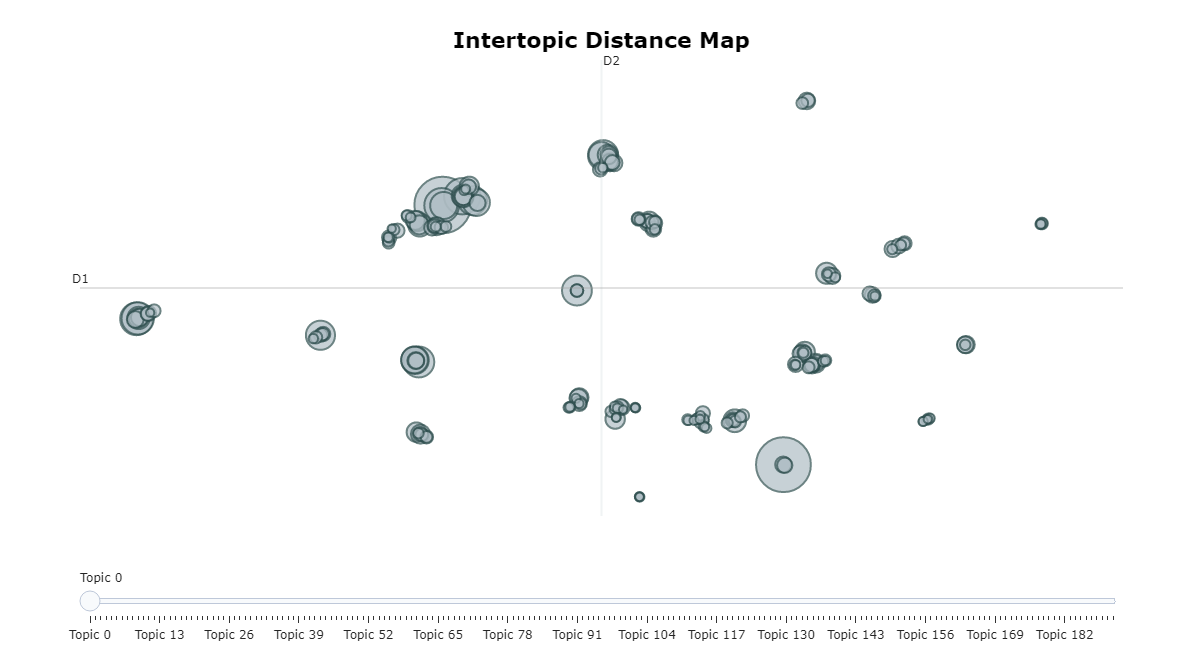

In [7]:
BERTopic_mpnet_base_1.visualize_topics()

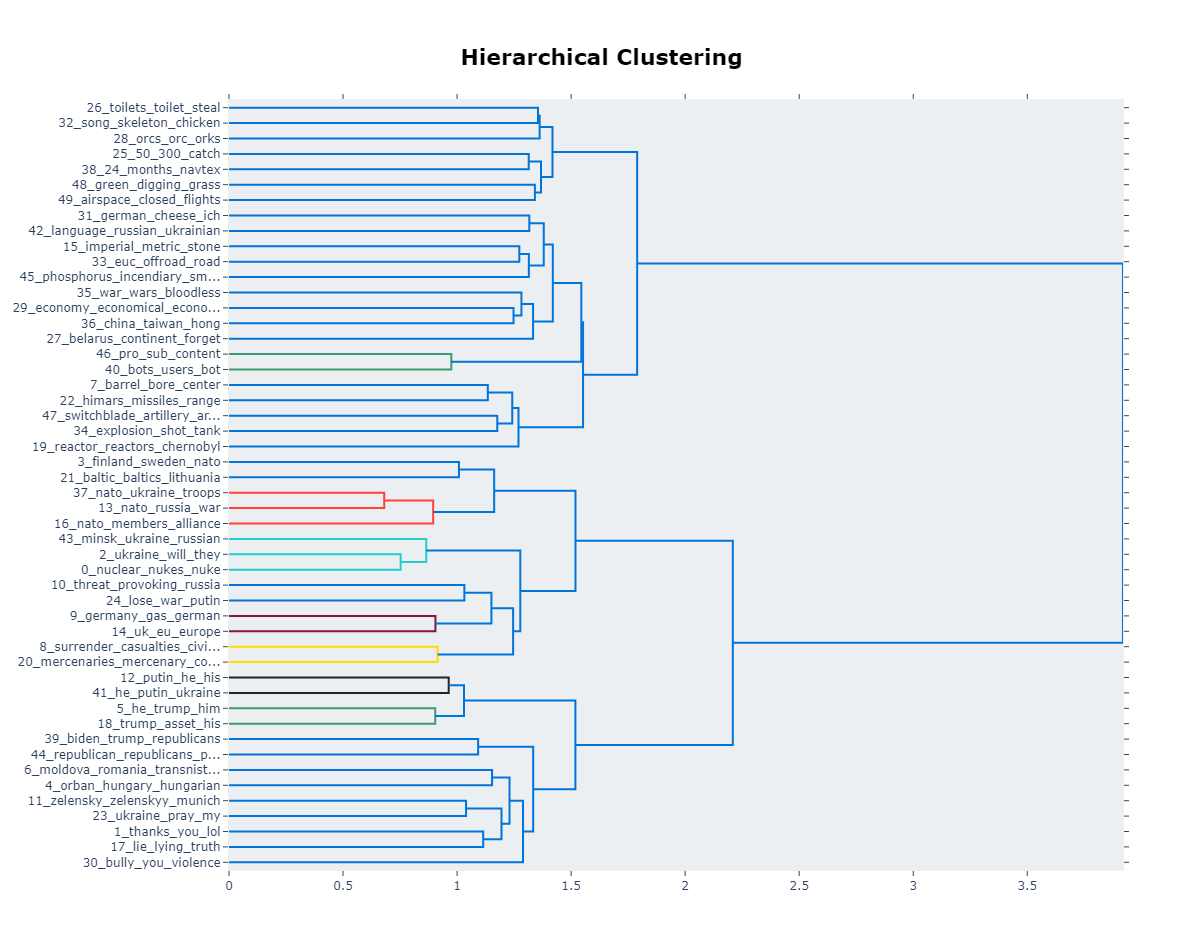

In [8]:
BERTopic_mpnet_base_1.visualize_hierarchy(top_n_topics=50)

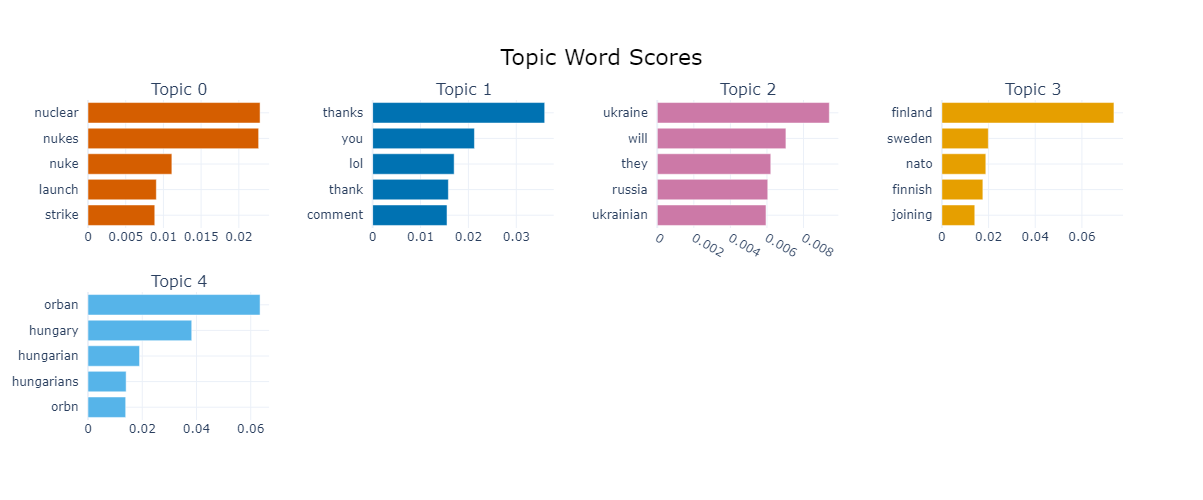

In [9]:
BERTopic_mpnet_base_1.visualize_barchart(top_n_topics=5)

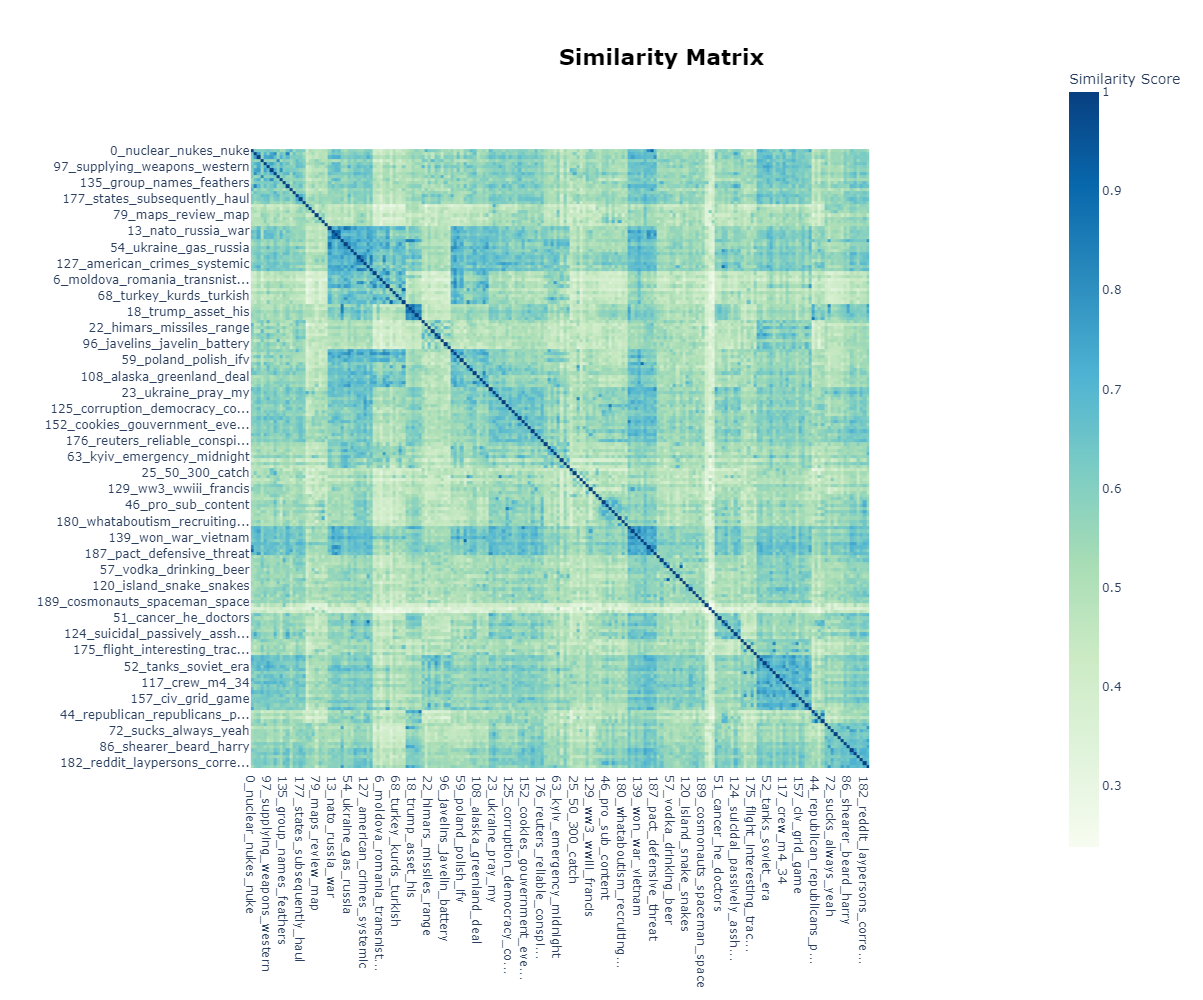

In [10]:
BERTopic_mpnet_base_1.visualize_heatmap(n_clusters=20, width=1000, height=1000)



<br/>

## <font size="20"> &#8681; </font> Sentiment Analysis

- In previous steps, we have obtained a dataframe with all the comments and their sentiments are identified in multiple ways.

|            Predictive Model            |        Column Name       |          Labels          |
|                   ---                  |            ---           |            ---           |
| Vader Sentiments (Binary)              | Vader_sentiment          | `"pos", "neg"`           |
| Vader Sentiments (Threefold)           | Vader_sentiment_neu      | `"pos", "neg", "neu"`    |
| DistilBertSentiment                    | DistilBertLabel          | `"0", "1", "2"`          |
| DistilBertSentiment                    | DistilBert_sentiment     | `"neg", "neu", "pos"`    |
| DistilBertLabel_TransferLearning       | DistilBertLabel_TR       | `"0", "1"`               |
| DistilBertLabel_TransferLearning       | DistilBert_TR_sentiment  | `"neg", "pos"`           |
| Plutchik's Wheel of Emotions           | anger                    |  `"0", "1"`              |
| Plutchik's Wheel of Emotions           | anticipation             |  `"0", "1"`              |
| Plutchik's Wheel of Emotions           | disgust                  |  `"0", "1"`              |
| Plutchik's Wheel of Emotions           | fear                     |  `"0", "1"`              |
| Plutchik's Wheel of Emotions           | joy                      |  `"0", "1"`              |
| Plutchik's Wheel of Emotions           | love                     |  `"0", "1"`              |
| Plutchik's Wheel of Emotions           | optimism                 |  `"0", "1"`              |
| Plutchik's Wheel of Emotions           | pessimism                |  `"0", "1"`              |
| Plutchik's Wheel of Emotions           | sadness                  |  `"0", "1"`              |
| Plutchik's Wheel of Emotions           | surprise                 |  `"0", "1"`              |
| Plutchik's Wheel of Emotions           | trust                    |  `"0", "1"`              |


In [4]:
df_1_analysis = pd.read_pickle("Saving_Part_3_BERTopic_df_1.p")

df_1_analysis.head(5)

,cleaned_text,Vader_sentiment,Vader_sentiment_neu,DistilBertLabel,DistilBert_sentiment,DistilBertLabel_TR,DistilBert_TR_sentiment,BERTopic_ID,BERTopic_Name
0,uhm thats quite the increase . i also heared t...,neg,neu,1,neu,0,neg,-1,-1_the_and_to_of
1,poland also announced that they plan to double...,pos,pos,1,neu,0,neg,59,59_poland_polish_ifv_48
2,"remember , nato knows more than were being tol...",pos,neu,0,neg,0,neg,-1,-1_the_and_to_of
3,"well done , putin . top 2022 salesman of nato ...",neg,neg,0,neg,0,neg,-1,-1_the_and_to_of
4,very good decision - russians are incapable of...,pos,pos,1,neu,1,pos,-1,-1_the_and_to_of
